In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
crimeData = pd.read_csv("C:/Users/ramgl/OneDrive/Desktop/ML/Project/Crimes_2010_2022.csv")

In [58]:
print('Size of Data',crimeData.size)
print('Shape of Data',crimeData.shape)
crimeData.head()
crimeData.tail()


Size of Data 75142408
Shape of Data (3415564, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3415559,12625618,JF153579,02/16/2022 12:00:00 AM,024XX S SAWYER AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,OTHER (SPECIFY),False,False,...,12.0,30.0,11,NaN,NaN,2022,02/24/2022 03:51:51 PM,NaN,NaN,NaN
3415560,12625240,JF153448,01/11/2021 08:00:00 AM,005XX E 51ST ST,0890,THEFT,FROM BUILDING,SCHOOL - PUBLIC BUILDING,False,False,...,4.0,40.0,06,NaN,NaN,2021,02/24/2022 03:51:51 PM,NaN,NaN,NaN
3415561,12621417,JF148517,02/17/2022 02:45:00 AM,039XX W GRAND AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER (SPECIFY),False,False,...,26.0,23.0,14,1150052.0,1908671.0,2022,02/24/2022 03:51:51 PM,41.905303,-87.724251,"(41.905303183, -87.724250697)"
3415562,12620904,JF147950,02/17/2022 08:00:00 PM,063XX S FAIRFIELD AVE,0560,ASSAULT,SIMPLE,STREET,False,False,...,17.0,66.0,08A,1159136.0,1862425.0,2022,02/24/2022 03:51:51 PM,41.778217,-87.692150,"(41.77821715, -87.692150295)"
3415563,12620468,JF147261,02/17/2022 09:45:00 AM,011XX N WESTERN AVE,0484,BATTERY,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...",SCHOOL - PUBLIC BUILDING,False,False,...,1.0,24.0,08B,1160197.0,1907701.0,2022,02/24/2022 03:51:51 PM,41.902438,-87.687012,"(41.902437713, -87.687011559)"


In [15]:
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415564 entries, 0 to 3415563
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [95]:
#Make a copy of dataframe and then perform the preprocessing
crimeData_clean = crimeData
print(crimeData_clean.shape)


(3415564, 22)


In [96]:
crimeData_clean = crimeData_clean[(crimeData_clean['Year'] >2011)]
crimeData_clean.head()
crimeData_clean.shape

(2693172, 22)

In [102]:
# print(crimeData_clean.size)
# print(crimeData_clean.shape)
# #to check if data is filtered
# sorted_df = crimeData_clean.sort_values(by=['Date'], ascending=True)
# sorted_df.head()


Text(0.5, 1.0, 'Missing data in %')

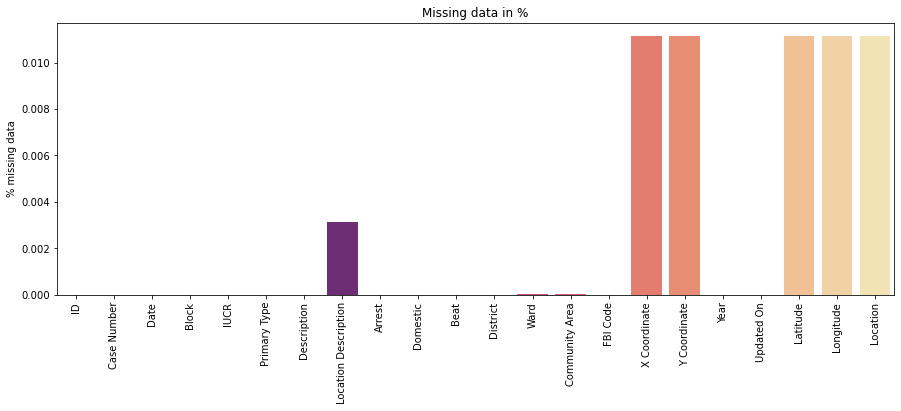

In [103]:
#Lets check for Missing Values
crimeData_null = crimeData_clean.isnull().sum()/crimeData_clean.isnull().count()

#find the total percent of missing values 
crimeData_sort = crimeData_null.sort_values(ascending=False)

crimeData_percent = crimeData_null *100
percent_round = (round(crimeData_percent,2).sort_values(ascending=False))

# Creating a data frame:
crimedata_missingvalues = pd.concat([crimeData_sort, percent_round], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

#Plotting of missing values
plt.figure(figsize=(15,5))
sns.barplot(x = np.arange(len(crimeData_null)), y =crimeData_null, palette="magma")
plt.xticks(np.arange(len(crimeData_null)),crimeData_null.index,rotation=90)
plt.ylabel('% missing data')
plt.title("Missing data in %")
#plt.savefig("Missing Data Variables.jpg")

In [107]:
#Drop null values in data
crimeData_clean=crimeData_clean.dropna()
print(crimeData_clean.isnull().values.any())

False
